In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("customer_support_tickets.csv")
data.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [58]:
print("Shape:", data.shape)
print("\nInfo:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())


Shape: (8469, 17)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 no

In [59]:
data.drop(columns=["Ticket ID", "Customer Name", "Customer Email"], inplace=True)


In [60]:
data = data[data["Customer Satisfaction Rating"].notnull()]
print("Shape after filtering:", data.shape)


Shape after filtering: (2769, 14)


In [61]:
data["Date of Purchase"] = pd.to_datetime(data["Date of Purchase"], errors='coerce')
data["First Response Time"] = pd.to_datetime(data["First Response Time"], errors='coerce')
data["Time to Resolution"] = pd.to_datetime(data["Time to Resolution"], errors='coerce')


In [62]:
data["Response Time (hrs)"] = (
    data["First Response Time"] - data["Date of Purchase"]
).dt.total_seconds().abs() / 3600

data["Resolution Time (hrs)"] = (
    data["Time to Resolution"] - data["First Response Time"]
).dt.total_seconds().abs() / 3600


In [63]:
data["Resolution"].fillna("Not Provided", inplace=True)

data["Response Time (hrs)"] = data["Response Time (hrs)"].fillna(data["Response Time (hrs)"].median())
data["Resolution Time (hrs)"] = data["Resolution Time (hrs)"].fillna(data["Resolution Time (hrs)"].median())


/var/folders/th/cq855w0x6hxflkm05hb5n1kh0000gn/T/ipykernel_25802/554851312.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Resolution"].fillna("Not Provided", inplace=True)


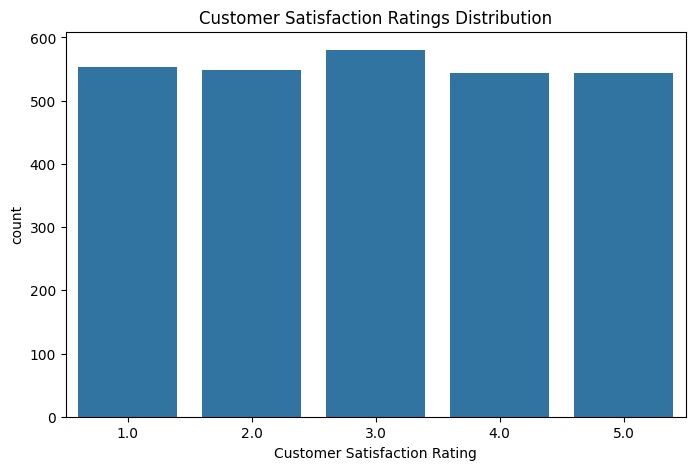

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x="Customer Satisfaction Rating", data=data)
plt.title("Customer Satisfaction Ratings Distribution")
plt.show()


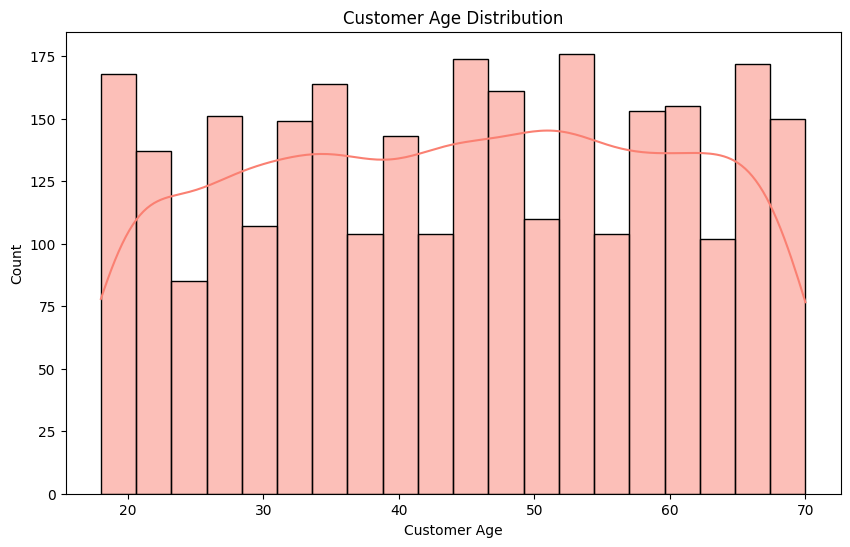

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(data['Customer Age'], bins=20, kde=True, color='salmon')
plt.title('Customer Age Distribution')
plt.show()


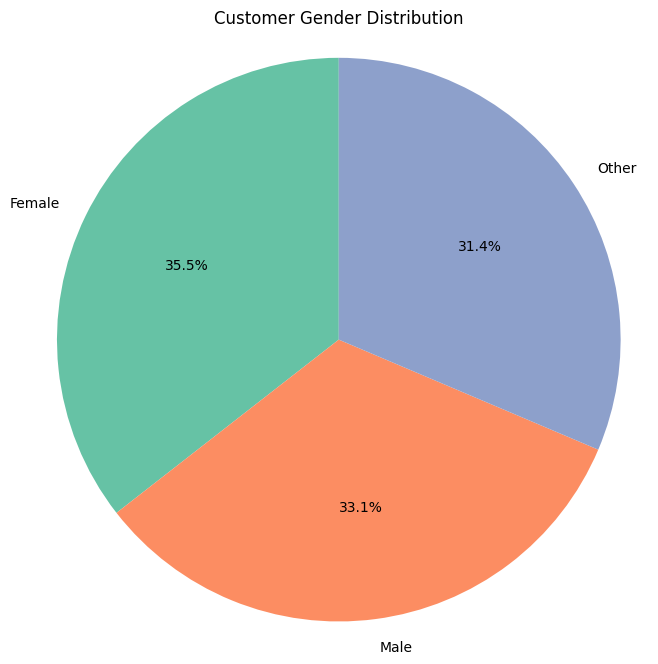

In [66]:
gender_dist = data['Customer Gender'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%',
        colors=sns.color_palette('Set2'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()


/var/folders/th/cq855w0x6hxflkm05hb5n1kh0000gn/T/ipykernel_25802/2190254260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_dist.index, y=channel_dist.values, palette='rocket')


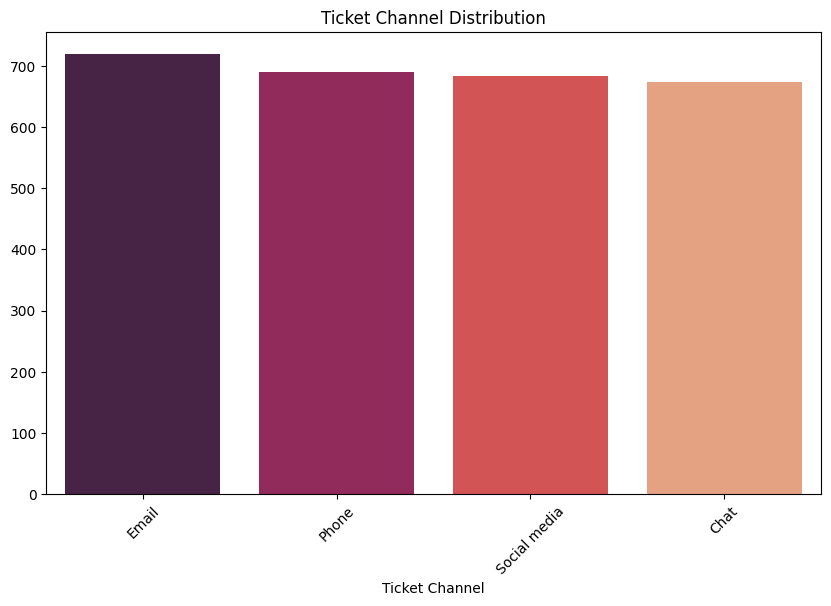

In [67]:
channel_dist = data['Ticket Channel'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=channel_dist.index, y=channel_dist.values, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xticks(rotation=45)
plt.show()


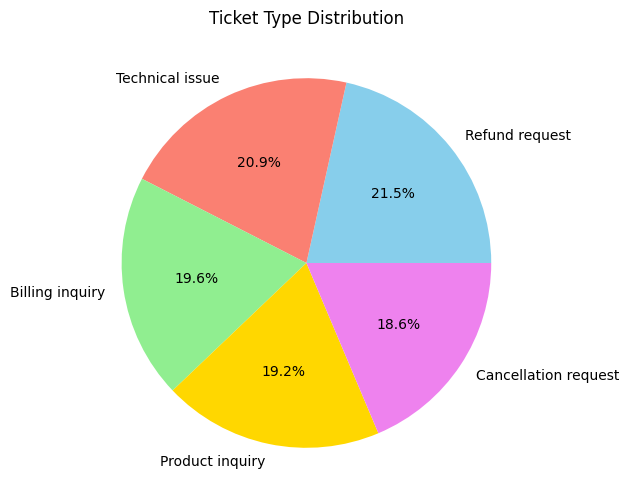

In [68]:
ticket_type_dist = data['Ticket Type'].value_counts()

plt.figure(figsize=(8,6))
ticket_type_dist.plot(kind='pie', autopct='%1.1f%%',
                      colors=['skyblue','salmon','lightgreen','gold','violet'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()


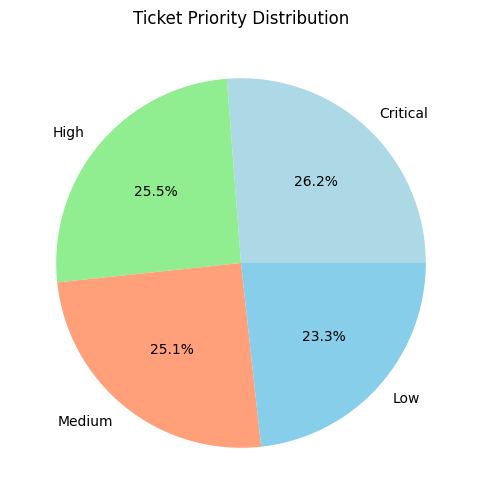

In [69]:
priority_dist = data['Ticket Priority'].value_counts()

plt.figure(figsize=(8,6))
priority_dist.plot(kind='pie', autopct='%1.1f%%',
                   colors=['lightblue','lightgreen','lightsalmon','skyblue'])
plt.title('Ticket Priority Distribution')
plt.ylabel('')
plt.show()


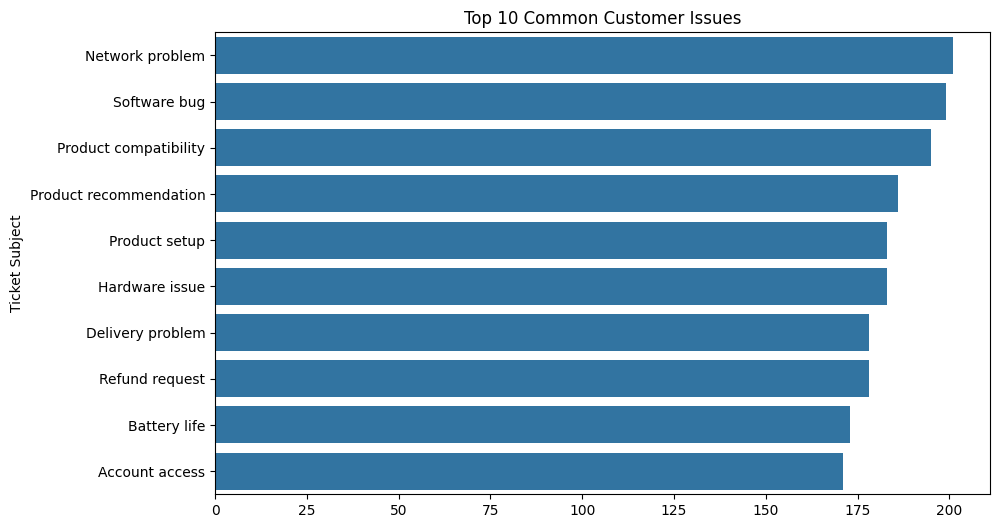

In [70]:
common_issues = data['Ticket Subject'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=common_issues.values, y=common_issues.index)
plt.title("Top 10 Common Customer Issues")
plt.show()


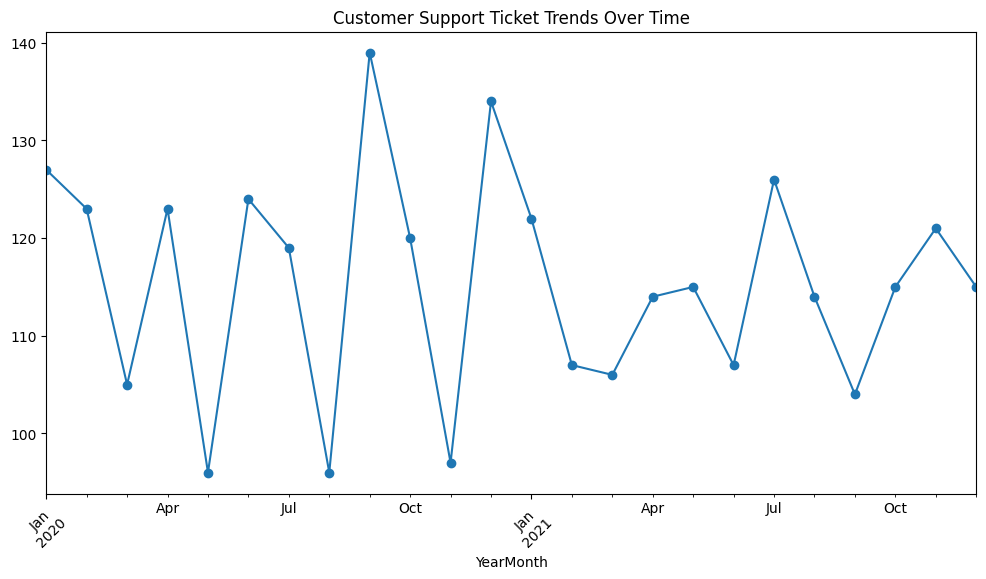

In [71]:
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')
ticket_trends = data.groupby('YearMonth').size()

plt.figure(figsize=(12,6))
ticket_trends.plot(marker='o')
plt.title("Customer Support Ticket Trends Over Time")
plt.xticks(rotation=45)
plt.show()


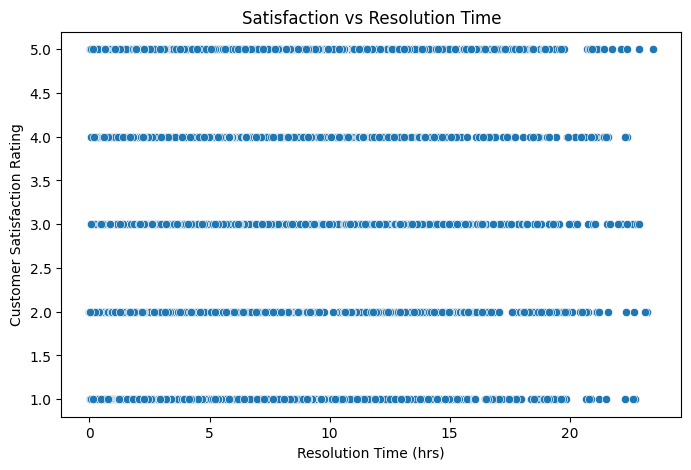

In [72]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Resolution Time (hrs)", y="Customer Satisfaction Rating", data=data)
plt.title("Satisfaction vs Resolution Time")
plt.show()


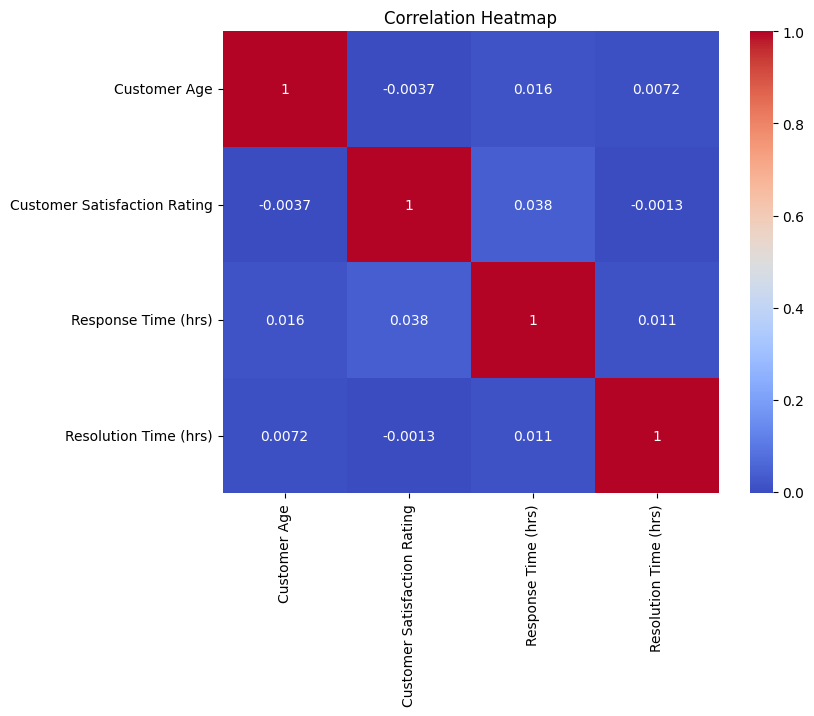

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


/var/folders/th/cq855w0x6hxflkm05hb5n1kh0000gn/T/ipykernel_25802/997551925.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = data.groupby('Age Group').size()


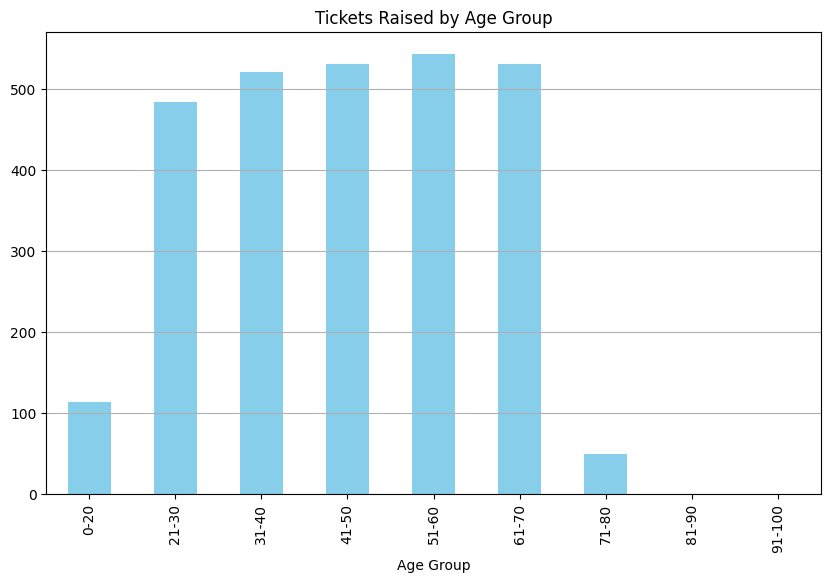

In [74]:
bins = [0,20,30,40,50,60,70,80,90,100]
labels = ['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

age_group_counts = data.groupby('Age Group').size()

plt.figure(figsize=(10,6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.grid(axis='y')
plt.show()


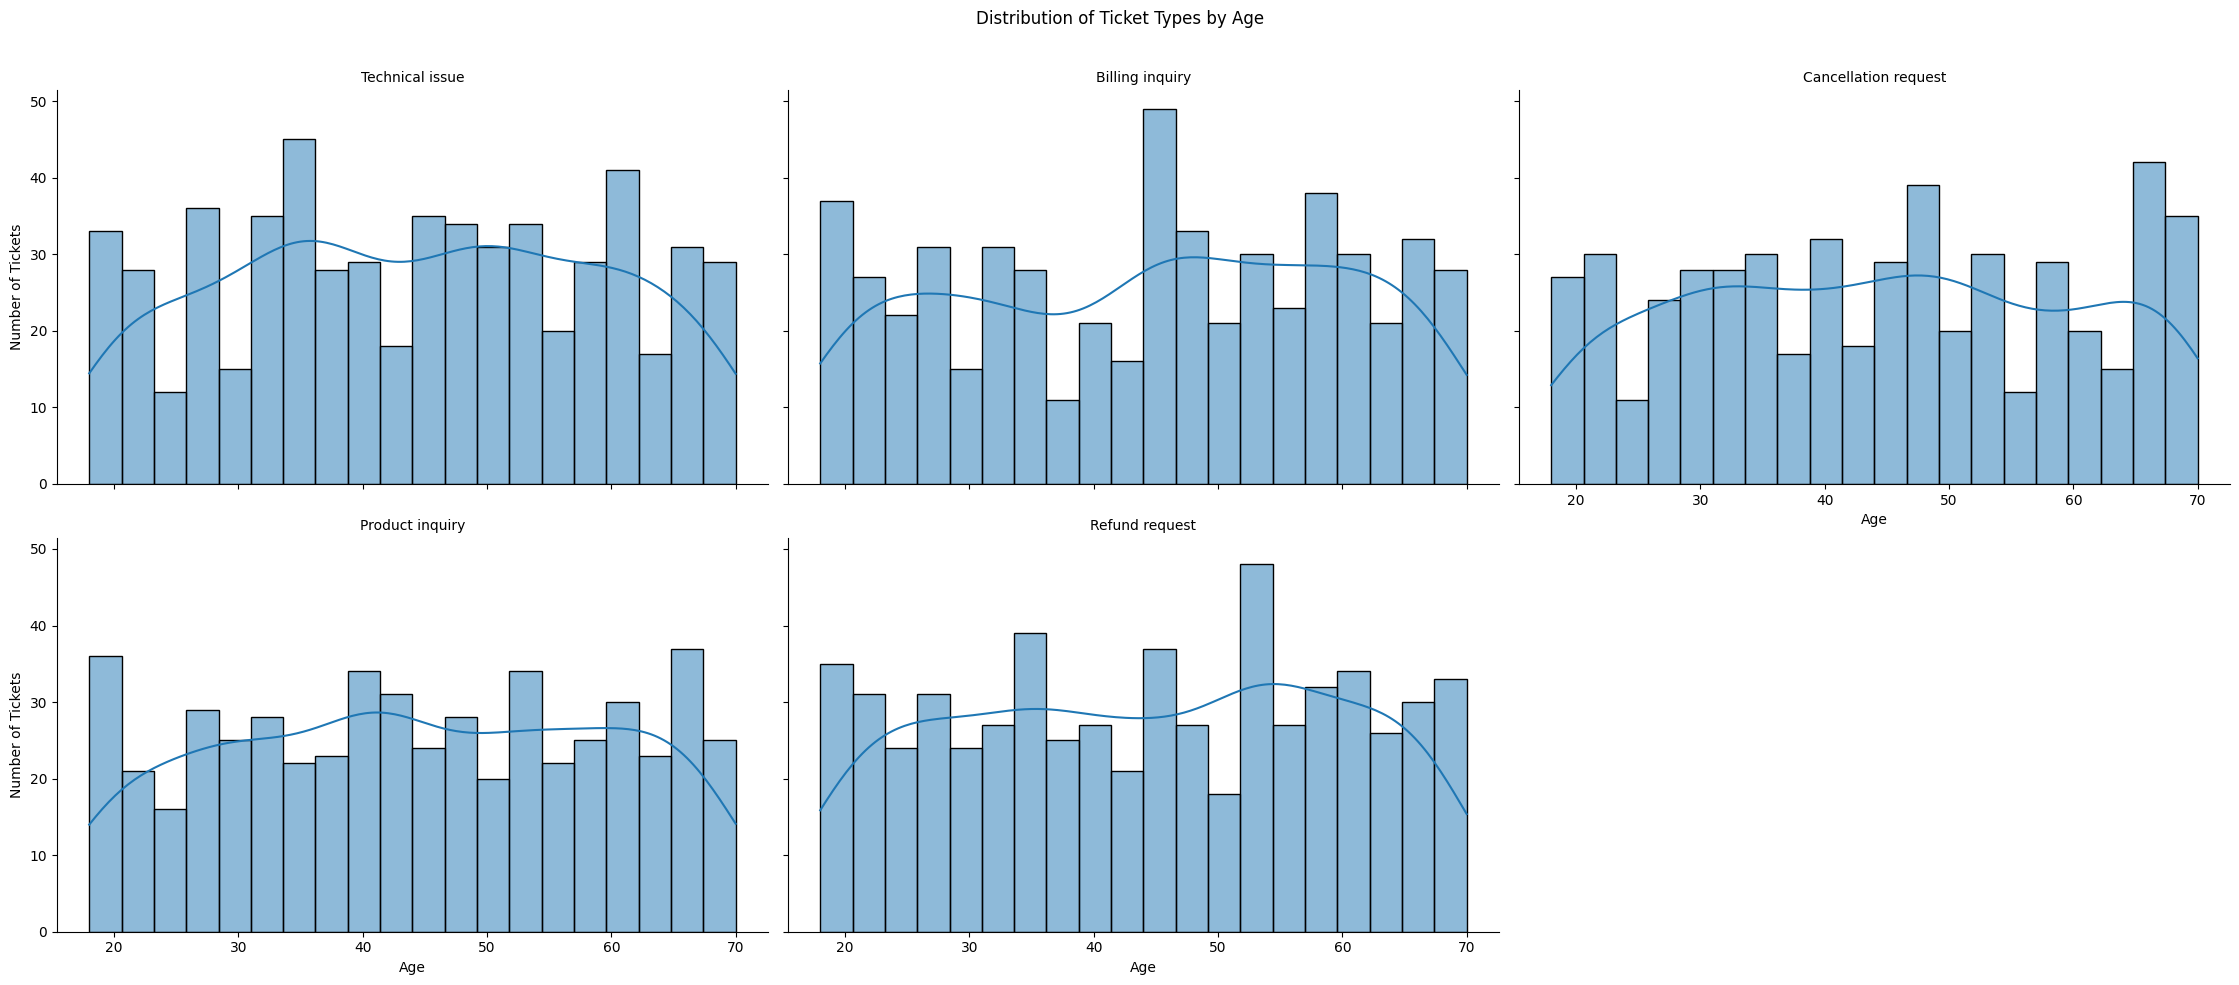

In [75]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3, height=5, aspect=1.5)
g.map_dataframe(sns.histplot, x='Customer Age', bins=20, kde=True)

g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
plt.show()


In [76]:
# Target variable
y = data['Customer Satisfaction Rating']

# Drop target from features
X = data.drop(columns=['Customer Satisfaction Rating'])

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (2769, 17)
Target shape: (2769,)


In [77]:
# Combine text features into one column
X['Combined_Text'] = (
    X['Ticket Subject'].fillna('') + " " +
    X['Ticket Description'].fillna('') + " " +
    X['Resolution'].fillna('')
)

# Drop original text columns
X.drop(columns=['Ticket Subject', 'Ticket Description', 'Resolution'], inplace=True)


In [78]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel', 'Combined_Text']
Numerical Columns: ['Customer Age', 'Response Time (hrs)', 'Resolution Time (hrs)']


In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))


In [80]:
# Drop columns not suitable for ML
cols_to_drop = [
    'Date of Purchase',
    'First Response Time',
    'Time to Resolution',
    'Age Group'
]

X = X.drop(columns=cols_to_drop, errors='ignore')

print("Remaining columns:\n", X.dtypes)


Remaining columns:
 Customer Age                 int64
Customer Gender              int64
Product Purchased            int64
Ticket Type                  int64
Ticket Status                int64
Ticket Priority              int64
Ticket Channel               int64
Response Time (hrs)        float64
Resolution Time (hrs)      float64
YearMonth                period[M]
Combined_Text                int64
dtype: object


In [81]:
# Drop the remaining non-numeric column
X = X.drop(columns=['YearMonth'], errors='ignore')

print(X.dtypes)


Customer Age               int64
Customer Gender            int64
Product Purchased          int64
Ticket Type                int64
Ticket Status              int64
Ticket Priority            int64
Ticket Channel             int64
Response Time (hrs)      float64
Resolution Time (hrs)    float64
Combined_Text              int64
dtype: object


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (2215, 10)
Testing set size: (554, 10)


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training shape:", X_train_scaled.shape)
print("Scaled testing shape:", X_test_scaled.shape)


Scaled training shape: (2215, 10)
Scaled testing shape: (554, 10)


In [84]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train on scaled training data
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [85]:
# Predict on test data
y_pred = rf_model.predict(X_test_scaled)

# Preview predictions
y_pred[:10]


array([4., 5., 3., 2., 5., 5., 2., 3., 3., 5.])

In [86]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.22021660649819494

Classification Report:

              precision    recall  f1-score   support

         1.0       0.21      0.19      0.20       109
         2.0       0.23      0.26      0.24       117
         3.0       0.23      0.23      0.23       112
         4.0       0.18      0.17      0.17       108
         5.0       0.26      0.25      0.25       108

    accuracy                           0.22       554
   macro avg       0.22      0.22      0.22       554
weighted avg       0.22      0.22      0.22       554



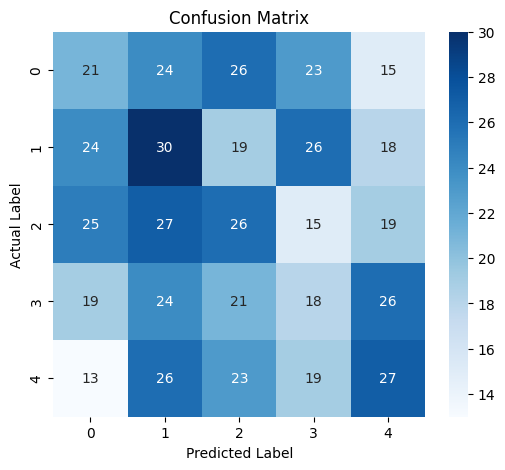

In [87]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [88]:
# Get feature importance from Random Forest
importances = rf_model.feature_importances_

feature_names = X.columns  # Column names after preprocessing

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
7,Response Time (hrs),0.164596
8,Resolution Time (hrs),0.163581
9,Combined_Text,0.163542
0,Customer Age,0.142438
2,Product Purchased,0.135426
3,Ticket Type,0.065152
5,Ticket Priority,0.060208
6,Ticket Channel,0.060071
1,Customer Gender,0.044985
4,Ticket Status,0.000000


/var/folders/th/cq855w0x6hxflkm05hb5n1kh0000gn/T/ipykernel_25802/2104725473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


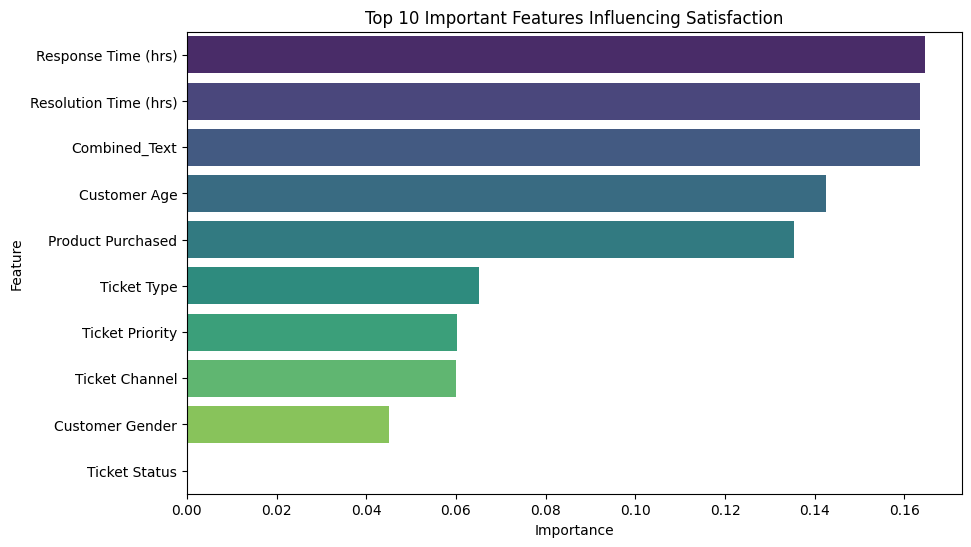

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(10),
    palette='viridis'
)

plt.title("Top 10 Important Features Influencing Satisfaction")
plt.show()
